In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from scipy.integrate import odeint
import scipy.optimize as opt
import emcee
%matplotlib inline

In [2]:
#Problem 1
print 'part a'
pi=np.pi
L0=const.L_sun.value
r0=const.R_earth.value
sigma0=const.sigma_sb.value
d0=1.5e11
A=0.3
Fin=L0/(4*pi*d0**2)
print Fin
Ein=Fin*pi*r0**2*(1-A)
print Ein
T4=(Ein/(4*pi*r0**2)/sigma0)
T=T4**(1./4.)
print T, '<-Temperature'
print 'part b'
Ein2=sigma0*T4*(1-A)*4*pi*r0**2
Eint=Ein+Ein2
T4b=(Eint/(4*pi*r0**2)/sigma0)
Tb=T4b**(1./4.)
print Tb, '<-Temperature'
print 'part c'
print 'Fin=pi*integral of (1-a(l))*B(l, T)*dl from 0 to infinity'
#Ttot=(L0/(sigma0*16*pi*d0**2)*(1-A)*(2-A))**(1./4.)
print 'Ttot=(pi/(4*sigma0)*integral of (1-a(l))*(2-a(l)*B(l, T)*dl from 0 to infinity) to the quarter power.'
#print Ttot
print 'part d'
print 'Carbon Dioxide is definitely within the major wavelength range.'
print 'Also, it is pretty abundant in the atm. so it is the most problematic.'
print 'part e'
print 'Yes. Carbon dioxide level is increasing as well as global temperature.'

part a
1360.24424696
1.2168929114e+17
254.542807349 <-Temperature
part b
290.651828842 <-Temperature
part c
Fin=pi*integral of (1-a(l))*B(l, T)*dl from 0 to infinity
Ttot=(pi/(4*sigma0)*integral of (1-a(l))*(2-a(l)*B(l, T)*dl from 0 to infinity) to the quarter power.
part d
Carbon Dioxide is definitely within the major wavelength range.
Also, it is pretty abundant in the atm. so it is the most problematic.
part e
Yes. Carbon dioxide level is increasing as well as global temperature.


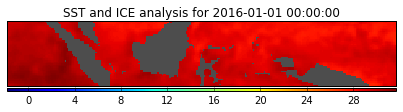

In [20]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,01,01,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=90.,llcrnrlat=-5.,urcrnrlon=150.,urcrnrlat=5.,projection='merc',lat_1=-5.,lat_2=5.,lon_0=120,resolution=None)

# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
#m.drawparallels(np.arange(-90.,99.,30.))
#m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
#m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
#m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()


part b


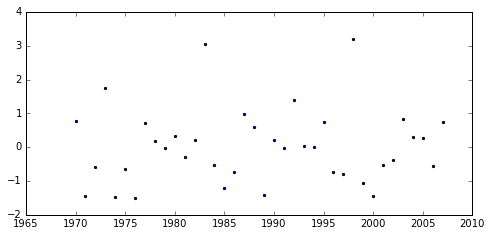

In [20]:
#Problem 2
print 'part b'
yr0=np.loadtxt('calidata_final.dat', usecols=[0])
T0=np.loadtxt('calidata_final.dat', usecols=[1])
Prec0=np.loadtxt('calidata_final.dat', usecols=[2])
Snow0=np.loadtxt('calidata_final.dat', usecols=[3])
NINO3=np.loadtxt('calidata_final.dat', usecols=[4])
#print yr0, T0, NINO3

fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.scatter(yr0, NINO3, s=5)
#ax1.errorbar(z, mu, yerr=sigma, linestyle="None")
#plt.xlim(xmin=0)
plt.show()

In [5]:
print 'part c'
print 'Five largest EI Nino occurred 1983, 1998, 1972, 1992, 1987.'

part c
Five largest EI Nino occurred 1983, 1998, 1972, 1992, 1987.


part d


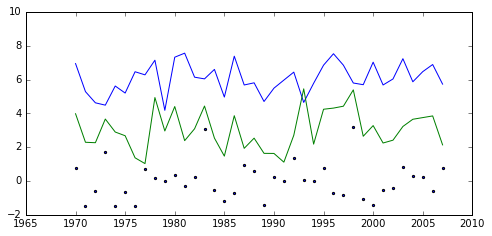

Yes. Temperature/Precipitation are either extremely high or low.


In [13]:
print 'part d'
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(211)
ax1.scatter(yr0, NINO3, s=5)
ax1.plot(yr0, T0, label='T')
ax1.plot(yr0, Prec0/100, label='P')
#ax1.errorbar(z, mu, yerr=sigma, linestyle="None")
#plt.xlim(xmin=0)
plt.show()
print 'Yes. Temperature/Precipitation are either extremely high or low.'

In [22]:
print 'part e'
def r(x, y):
    mx=np.mean(x)
    my=np.mean(y)
    sn=0
    sd1=0
    sd2=0
    for i in range(0, len(x)-1):
        sn+=(x[i]-mx)*(y[i]-my)
        sd1+=(x[i]-mx)**2
        sd2+=(y[i]-my)**2
        
    r0=sn/np.sqrt(sd1*sd2)
    return r0

print 'correlation of NINO3 with temperature is ', r(NINO3, T0)
print 'correlation of NINO3 with precipitation is ', r(NINO3, Prec0)
print 'correlation of NINO3 with snow is ', r(NINO3, Snow0)

part e
correlation of NINO3 with temperature is  0.0116917676495
correlation of NINO3 with precipitation is  0.395964078652
correlation of NINO3 with snow is  0.136006593701


In [23]:
print 'part f'

print 'Definitely heat is expanding.'
print 'I would say we are in a warm event.'
print 'especially along the coast, we can observe obvious changes.'

part f
Definitely heat is expanding.
I would say we are in a warm event.
especially along the coast, we can observe obvious changes.
